In [319]:
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [320]:
%cd /gdrive/'My Drive'/Dataset/Insurance-Claims-Severity-Prediction/data/

/gdrive/My Drive/Dataset/Insurance-Claims-Severity-Prediction/data


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
train = pd.read_csv('train.csv')

test = pd.read_csv('test.csv')

In [323]:
print('Train shape:',train.shape)
print('Test shape:',test.shape)

Train shape: (188318, 132)
Test shape: (125546, 131)


In [324]:
train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,...,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,...,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [0]:
def null_percentage(df):
    '''
    input: dataframe
    output: Null percentage of columns in dataframe
    
    '''
    percent = df.isnull().sum()/len(df.index)*100
    df = pd.DataFrame(round(percent,2),columns=['null_percent'])
    
    
    return df[df['null_percent']!=0.00].sort_values('null_percent',ascending=False)

In [326]:
null_percentage(train)

,null_percent


In [327]:
null_percentage(test)

,null_percent


In [0]:
def cat_count(df):
  counts = {}
  cat_cols = df.select_dtypes(include=['object']).columns
  for i in range(len(cat_cols)):
    counts[cat_cols[i]] = len(df[cat_cols[i]].value_counts())
    
  return pd.DataFrame(data=counts.values(), index=counts.keys(),columns=['Categories Counts']).sort_values('Categories Counts',ascending=False)

In [329]:
counts = cat_count(train)
counts

,Categories Counts
cat116,326
cat110,131
cat109,84
cat113,61
cat112,51
cat115,23
cat107,20
cat105,20
cat101,19
cat114,19


In [330]:
print(list(counts.index))

['cat116', 'cat110', 'cat109', 'cat113', 'cat112', 'cat115', 'cat107', 'cat105', 'cat101', 'cat114', 'cat106', 'cat104', 'cat111', 'cat99', 'cat100', 'cat103', 'cat108', 'cat102', 'cat89', 'cat96', 'cat91', 'cat92', 'cat90', 'cat97', 'cat94', 'cat93', 'cat95', 'cat98', 'cat82', 'cat77', 'cat78', 'cat79', 'cat80', 'cat81', 'cat88', 'cat83', 'cat85', 'cat86', 'cat87', 'cat84', 'cat76', 'cat75', 'cat74', 'cat73', 'cat66', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65', 'cat71', 'cat67', 'cat68', 'cat69', 'cat70', 'cat72', 'cat2', 'cat60', 'cat1', 'cat58', 'cat29', 'cat27', 'cat26', 'cat25', 'cat24', 'cat23', 'cat22', 'cat21', 'cat20', 'cat19', 'cat18', 'cat17', 'cat16', 'cat15', 'cat14', 'cat13', 'cat12', 'cat11', 'cat10', 'cat9', 'cat8', 'cat7', 'cat6', 'cat5', 'cat4', 'cat3', 'cat28', 'cat30', 'cat57', 'cat31', 'cat56', 'cat55', 'cat54', 'cat53', 'cat52', 'cat51', 'cat50', 'cat49', 'cat48', 'cat47', 'cat46', 'cat45', 'cat44', 'cat43', 'cat42', 'cat41', 'cat40', 'cat39', 'cat38', 'cat37', '

In [331]:
train['cat2'].value_counts()

A    106721
B     81597
Name: cat2, dtype: int64

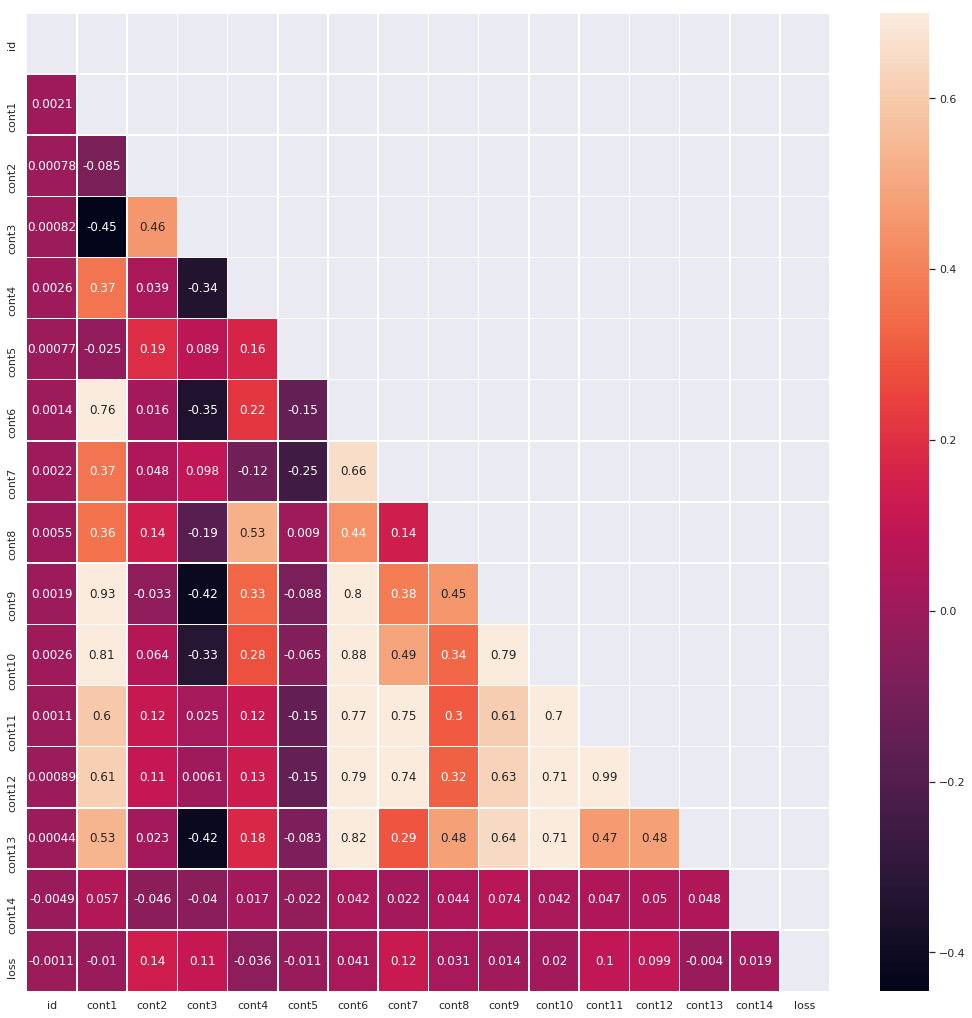

In [332]:
mask = np.zeros_like(train.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
  
  sns.set(rc={'figure.figsize':(18,18)})
  ax = sns.heatmap(train.corr(), mask=mask, vmax=.7,annot=True,linewidths=0.5)

In [0]:
train.drop(['cont12','cont1','cont6','cont9'],axis=1,inplace=True)
test.drop(['cont12','cont1','cont6','cont9'],axis=1,inplace=True)


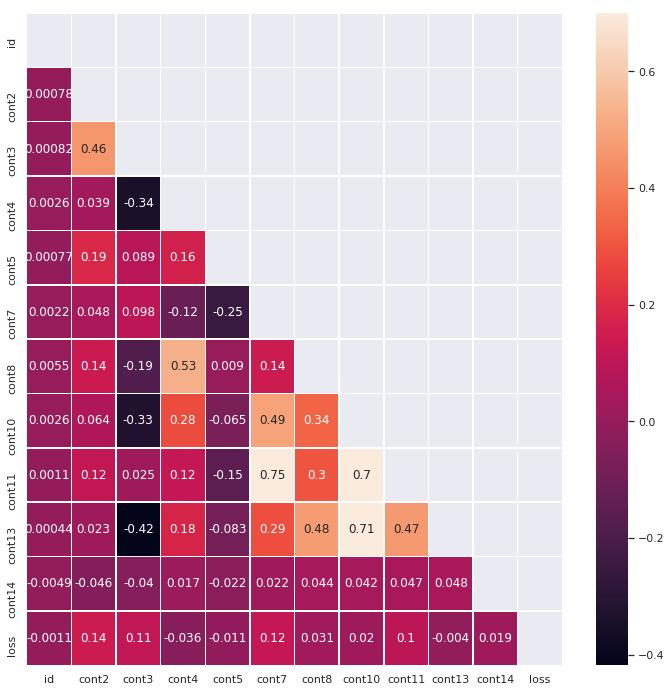

In [334]:
mask = np.zeros_like(train.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
  
  sns.set(rc={'figure.figsize':(12,12)})
  ax = sns.heatmap(train.corr(), mask=mask, vmax=.7,annot=True,linewidths=0.5)

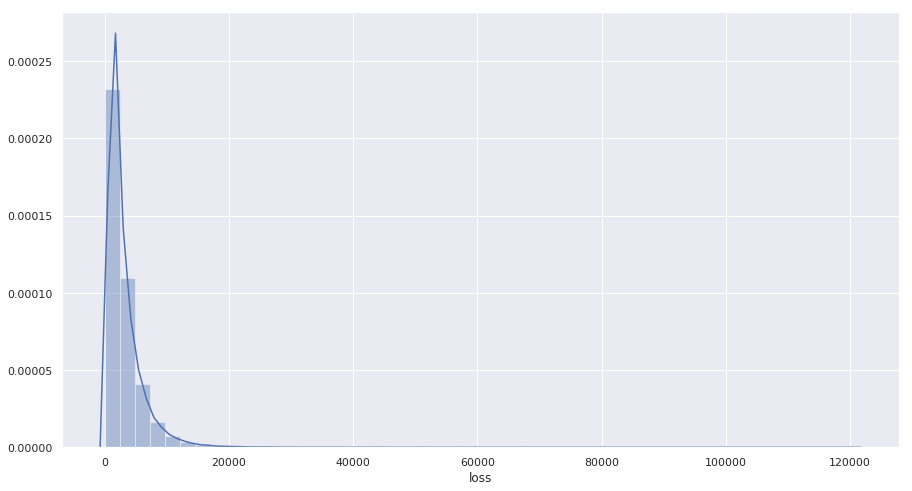

In [335]:
sns.set(rc={'figure.figsize':(15,8)})
sns.distplot(train['loss'])

In [336]:
print('loss',train['loss'].describe())

loss count    188318.000000
mean       3037.337686
std        2904.086186
min           0.670000
25%        1204.460000
50%        2115.570000
75%        3864.045000
max      121012.250000
Name: loss, dtype: float64


In [337]:
train.select_dtypes(include=['integer','float']).columns

Index(['id', 'cont2', 'cont3', 'cont4', 'cont5', 'cont7', 'cont8', 'cont10',
       'cont11', 'cont13', 'cont14', 'loss'],
      dtype='object')

In [0]:
train.drop(['id'],axis=1,inplace=True)
test.drop(['id'],axis=1,inplace=True)


In [0]:
num_cols = ['cont2', 'cont3', 'cont4', 'cont5', 'cont7', 'cont8', 'cont10',
       'cont11', 'cont13', 'cont14']

cat_cols = list(counts.index)

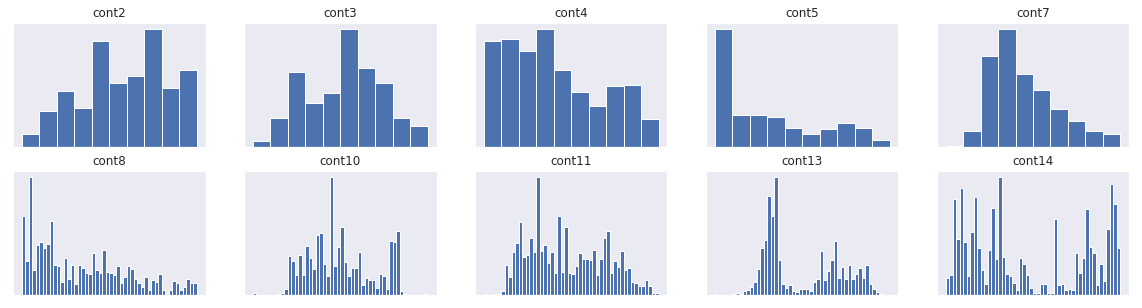

In [340]:
fig = plt.figure(figsize=(20,5))

for i in range(5):
    ax = fig.add_subplot(2, 5, i+1 , xticks=[], yticks=[])
    ax.hist(train[num_cols[i]], bins=10)
    ax.set_title(num_cols[i])

    ax = fig.add_subplot(2, 5, i+6 , xticks=[], yticks=[])
    ax.hist(train[num_cols[i+5]], bins=50)
    ax.set_title(num_cols[i+5])
    

In [0]:
merged = pd.concat([train,test],sort=False)

In [342]:
merged.shape

(313864, 127)

In [343]:
null_percentage(merged)

,null_percent
loss,40.0


In [0]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder


In [0]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,Normalizer


lb = LabelEncoder()

for cat in cat_cols:
  merged[cat] = lb.fit_transform(merged[cat])


In [346]:
merged.tail(5)

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,...,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont2,cont3,cont4,cont5,cont7,cont8,cont10,cont11,cont13,cont14,loss
125541,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,3,3,4,0,0,12,11,0,0,0,5,5,6,5,3,34,62,2,9,46,0,10,175,0.245921,0.654310,0.284048,0.281143,0.815941,0.39455,0.40666,0.550529,0.298734,0.345946,NaN
125542,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,...,0,0,0,1,7,3,3,2,4,4,3,15,5,0,1,3,4,5,8,9,10,34,89,0,22,36,8,14,94,0.488789,0.549770,0.267727,0.674529,0.424968,0.47669,0.26894,0.324486,0.490001,0.290576,NaN
125543,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,2,0,0,1,7,3,3,2,4,0,2,15,5,5,0,1,10,7,5,7,6,34,41,0,30,39,0,15,311,0.555782,0.484196,0.594598,0.794794,0.511502,0.72299,0.83510,0.933174,0.848129,0.808125,NaN
125544,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,1,2,4,4,3,15,9,0,1,0,4,4,9,10,10,70,104,0,36,5,4,14,88,0.358319,0.484196,0.373816,0.302678,0.388545,0.31796,0.36974,0.307628,0.608259,0.361542,NaN
125545,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,3,3,4,4,0,12,7,6,0,0,3,4,9,6,1,2,113,0,6,6,0,11,70,0.299102,0.549770,0.208655,0.413817,0.242044,0.25461,0.25183,0.245410,0.287682,0.220323,NaN


In [0]:
train = merged[merged['loss'].notna()]
test = merged[merged['loss'].isna()]

In [348]:
print(train.shape)
print(test.shape)

(188318, 127)
(125546, 127)


In [349]:
train['loss'] = np.log1p(train['loss'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [350]:
from sklearn.preprocessing import MinMaxScaler
  
scaler = MinMaxScaler()
train.loc[:,num_cols] = scaler.fit_transform(train.loc[:,num_cols])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [351]:
train.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,...,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont2,cont3,cont4,cont5,cont7,cont8,cont10,cont11,cont13,cont14,loss
0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,1,2,4,0,2,15,1,6,0,0,8,4,6,9,6,46,28,2,19,57,0,14,288,0.284121,0.196416,0.788187,0.041163,0.285393,0.088414,0.839313,0.554715,0.832028,0.804541,7.702637
1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,3,2,4,4,3,15,11,5,0,0,4,4,8,10,10,34,67,0,22,39,0,14,94,0.854225,0.626632,0.562422,0.860732,0.394501,0.489681,0.441406,0.314495,0.618460,0.187595,7.158203
2,0,1,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,3,3,2,4,4,0,1,11,14,0,1,4,5,7,5,0,2,87,0,28,6,0,8,167,0.414588,0.511420,0.077187,0.165012,0.264420,0.048862,0.326097,0.359217,0.197802,0.894121,8.008396
3,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,3,2,4,4,3,15,8,3,0,0,4,4,8,10,10,34,69,2,39,5,0,14,88,0.643795,0.557931,0.253282,0.200881,0.345649,0.109078,0.446914,0.303703,0.612031,0.635849,6.846784
4,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,7,3,1,3,4,4,0,12,5,9,0,0,3,4,10,6,1,67,51,2,50,39,0,10,63,0.184376,0.557931,0.381130,0.602287,0.191194,0.011785,0.213371,0.175796,0.248701,0.380205,7.924742


In [353]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188318 entries, 0 to 188317
Columns: 127 entries, cat1 to loss
dtypes: float64(11), int64(116)
memory usage: 183.9 MB


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train.drop(['loss'],axis=1), train['loss'], test_size=0.1, random_state=101)

In [0]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [359]:
lr.fit(X=X_train,y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
pred = lr.predict(X_valid)

In [364]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_valid, pred))


MAE: 0.46178192576261223


Text(0, 0.5, 'Prediction')

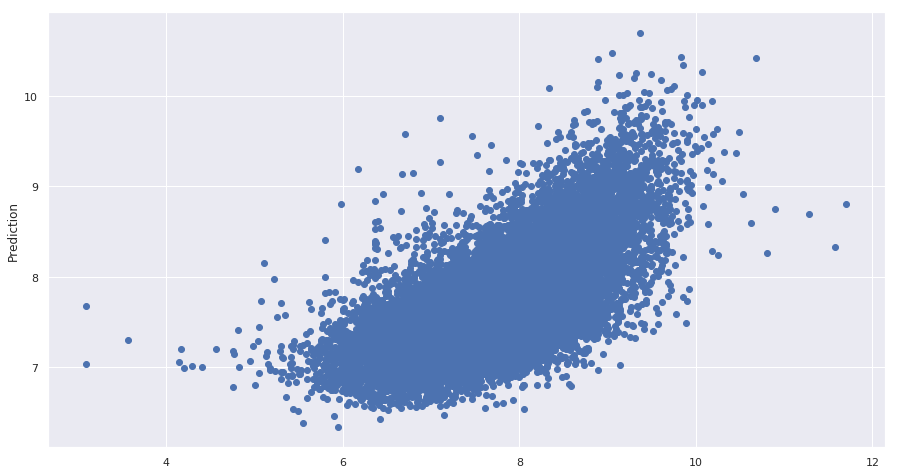

In [366]:
plt.scatter(y_valid,pred)
plt.ylabel("Prediction")
